## Arm Reaching (RM Session 1)

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from pathlib import Path
from sklearn.preprocessing import MinMaxScaler
# from google.colab import drive
# drive.mount('/content/drive')
from scipy.io import loadmat
from scipy.signal import butter, lfilter
warnings.filterwarnings('ignore')

### read paths of all .mat files in a list

In [8]:
folder_path=r'D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM'
folder_files=os.listdir(folder_path)
for i in folder_files:
    print(i)

EEG_session1_sub10_reaching_realMove.mat
EEG_session1_sub11_reaching_realMove.mat
EEG_session1_sub12_reaching_realMove.mat
EEG_session1_sub13_reaching_realMove.mat
EEG_session1_sub14_reaching_realMove.mat
EEG_session1_sub15_reaching_realMove.mat
EEG_session1_sub16_reaching_realMove.mat
EEG_session1_sub17_reaching_realMove.mat
EEG_session1_sub18_reaching_realMove.mat
EEG_session1_sub19_reaching_realMove.mat
EEG_session1_sub1_reaching_realMove.mat
EEG_session1_sub20_reaching_realMove.mat
EEG_session1_sub21_reaching_realMove.mat
EEG_session1_sub22_reaching_realMove.mat
EEG_session1_sub23_reaching_realMove.mat
EEG_session1_sub24_reaching_realMove.mat
EEG_session1_sub25_reaching_realMove.mat
EEG_session1_sub2_reaching_realMove.mat
EEG_session1_sub3_reaching_realMove.mat
EEG_session1_sub4_reaching_realMove.mat
EEG_session1_sub5_reaching_realMove.mat
EEG_session1_sub6_reaching_realMove.mat
EEG_session1_sub7_reaching_realMove.mat
EEG_session1_sub8_reaching_realMove.mat
EEG_session1_sub9_reachi

In [9]:
matfiles=[]
for i in folder_files:
    file=folder_path+'\\'+i
    matfiles.append(file) 
for i in matfiles:
    print(i)

D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub10_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub11_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub12_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub13_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub14_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub15_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub16_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub17_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-reaching\Session 1\RM\EEG_session1_sub18_reaching_realMove.mat
D:\EEG_ConvertedData\EEG_ConvertedData\Arm-rea

### explore all keys for a file

In [10]:
temp = loadmat(matfiles[0])
temp.keys()

dict_keys(['__header__', '__version__', '__globals__', 'mrk', 'mnt', 'nfo', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60', 'dat'])

In [11]:
col=1
for i in temp['nfo'][0][0][0][0]:
    print('ch'+str(col),' : ',i[0],end = '\n')
    col+=1

ch1  :  Fp1
ch2  :  AF7
ch3  :  AF3
ch4  :  AFz
ch5  :  F7
ch6  :  F5
ch7  :  F3
ch8  :  F1
ch9  :  Fz
ch10  :  FT7
ch11  :  FC5
ch12  :  FC3
ch13  :  FC1
ch14  :  T7
ch15  :  C5
ch16  :  C3
ch17  :  C1
ch18  :  Cz
ch19  :  TP7
ch20  :  CP5
ch21  :  CP3
ch22  :  CP1
ch23  :  CPz
ch24  :  P7
ch25  :  P5
ch26  :  P3
ch27  :  P1
ch28  :  Pz
ch29  :  PO7
ch30  :  PO3
ch31  :  POz
ch32  :  Fp2
ch33  :  AF4
ch34  :  AF8
ch35  :  F2
ch36  :  F4
ch37  :  F6
ch38  :  F8
ch39  :  FC2
ch40  :  FC4
ch41  :  FC6
ch42  :  FT8
ch43  :  C2
ch44  :  C4
ch45  :  C6
ch46  :  T8
ch47  :  CP2
ch48  :  CP4
ch49  :  CP6
ch50  :  TP8
ch51  :  P2
ch52  :  P4
ch53  :  P6
ch54  :  P8
ch55  :  PO4
ch56  :  PO8
ch57  :  O1
ch58  :  Oz
ch59  :  O2
ch60  :  Iz


### to_data_frame() :
- prepare a file in data frame
- map the labels correctly for their trials
- drop unnecessary channels
- take selected count of trials

In [12]:
def to_data_frame(matfile,selected_channels,number_of_trials):

    #load the mat file
    data = loadmat(matfile)

    #new data frame to extract the target data
    df=pd.DataFrame()

    #the scientific name for the selected electrodes
    selected_electrodes=[]
    for i in selected_channels:
        selected_electrodes.append('ch'+str(i)+'_'+data['nfo'][0][0][0][0][i-1][0])

    #select target channels in the data frame   
    index=0
    for i in selected_electrodes:
        added_channel = pd.DataFrame(data['ch'+str(selected_channels[index])],columns =[i])
        df = pd.concat([df,added_channel],axis=1)
        index+=1

    #add labels col & initialize withe none
    labels = np.empty(data['nfo'][0][0][2][0][0])  # data['nfo'][0][0][2][0][0] --> return number of frames (rows)
    labels.fill(np.nan) 
    trials =np.empty(data['nfo'][0][0][2][0][0])
    trials.fill(np.nan)

    #dictionary for mapping triger events to numbers from 0 to 6 in the same order 
    label_decode ={11:0 , 21:1 , 31:2 , 41:3 , 51:4 , 61:5 , 8:6}

    #labels extraction
    start_point_info = data['mrk'][0][0][5][0][0][0][0][0] 
    end_point_info = data['mrk'][0][0][5][0][0][0][0][1]
    trigger_marking_time = data['mrk'][0][0][0][0]
    trigger_number = data['mrk'][0][0][1][0]
    last_trial ={0:0 , 1:0 , 2:0 , 3:0 , 4:0 , 5:0 , 6:0}

    
    for i in range (0,data['nfo'][0][0][8][0][0]): # data['nfo'][0][0][2][0][0] --> 600 (300 trial + 300 rest period)

        start,end=0,0
        label=label_decode[trigger_number[i]]

        if last_trial[label]==number_of_trials:
            continue

        last_trial[label]+=1


        if i==0:
            start=start_point_info
            end=trigger_marking_time[i]
        elif i==599:
            start=trigger_marking_time[i]
            end=end_point_info
        else:
            start=trigger_marking_time[i-1]
            end=trigger_marking_time[i]

        for j in range (start,end):
            labels[j]=label
            trials[j]=last_trial[label]
       
    df=df.assign(Label=labels)
    df=df.assign(Trial=trials)

    #drop rest of rows which didn't assigned to label
    df.dropna(how='any',inplace=True)
     
    return df
    

### merge all subjects data in a global data frame and split it into 80% train and 20% test

In [13]:
glob_test=pd.DataFrame()
glob_train=pd.DataFrame()
selected_channels=[2,3,4,6,7,8,9,11,12,13,14,15,16,17,18]
labels_codes ={0:'Forward' , 1:'Backward' , 2:'Left' , 3:'Right' , 4:'Up' , 5:'Down' , 6:'Rest'}
number_of_trials=10  #selected number of trials for each class

In [14]:
for i in range (0,len(matfiles)):

    df=to_data_frame(matfiles[i],selected_channels,number_of_trials)

    test=df.loc[ (df['Trial']==10) | (df['Trial']==9)]
    df=df.loc[ (df['Trial']!=10) & (df['Trial']!=9)]

    glob_train=pd.concat([glob_train, df], axis=0)
    glob_test=pd.concat([glob_test, test], axis=0)

In [15]:
glob_train

ch2_AF7  ch3_AF3  ch4_AFz  ch6_F5  ch7_F3  ch8_F1  ch9_Fz  ch11_FC5  \
41843       -782     5340      574    5550    5013     763    7570      4127   
41844       -784     5326      568    5520    4992     750    7536      4129   
41845       -787     5311      563    5489    4972     738    7504      4130   
41846       -791     5298      557    5457    4952     728    7472      4132   
41847       -795     5282      552    5422    4927     717    7443      4131   
...          ...      ...      ...     ...     ...     ...     ...       ...   
1841757     -301    -1136     -118   -1548   -2603   -1300   -1369      -318   
1841758     -302    -1156     -117   -1521   -2599   -1286   -1334      -307   
1841759     -304    -1176     -117   -1493   -2597   -1275   -1301      -296   
1841760     -306    -1197     -117   -1466   -2596   -1265   -1272      -285   
1841761     -309    -1217     -117   -1438   -2595   -1257   -1246      -275   

         ch12_FC3  ch13_FC1  ch14_T7  ch15_C5  ch16_C3  ch17_C1  ch18_Cz  \
41843        6039      1578     2577     3586     9330     1366    13510   
41844        6025      1565     2583     3583     9338     1361    13506   
41845        6014      1552     2591     3581     9348     1359    13510   
41846        5991      1531     2597     3574     9355     1354    13512   
41847        5971      1512     2602     3566     9357     1345    13512   
...           ...       ...      ...      ...      ...      ...      ...   
1841757      -771      -196       32      -15      244      909     1397   
1841758      -745      -175       58       -6      272      913     1383   
1841759      -720      -154       83        2      298      916     1366   
1841760      -694      -134      107       10      324      917     1347   
1841761      -669      -115      130       17      349      918     1327   

         Label  Trial  
41843      2.0    1.0  
41844      2.0    1.0  
41845      2.0    1.0  
41846      2.0    1.0  
41847      2.0    1.0  
...        ...    ...  
1841757    2.0    8.0  
1841758    2.0    8.0  
1841759    2.0    8.0  
1841760    2.0    8.0  
1841761    2.0    8.0  

[23151015 rows x 17 columns]

In [16]:
glob_test

ch2_AF7  ch3_AF3  ch4_AFz  ch6_F5  ch7_F3  ch8_F1  ch9_Fz  ch11_FC5  \
280460      -542     1794    -1034    3551   -5441   -5731     139      3239   
280461      -490     1839    -1022    3576   -5411   -5691     171      3255   
280462      -439     1882    -1010    3600   -5382   -5648     203      3267   
280463      -391     1925     -998    3620   -5360   -5612     228      3278   
280464      -345     1965     -986    3636   -5336   -5576     258      3286   
...          ...      ...      ...     ...     ...     ...     ...       ...   
2201967     -343     -619     -118    -572    -142    -170      45      -200   
2201968     -334     -578     -120    -634    -162    -153      97      -209   
2201969     -324     -536     -122    -693    -180    -135     151      -218   
2201970     -312     -492     -124    -747    -195    -115     209      -227   
2201971     -298     -448     -125    -796    -207     -93     269      -235   

         ch12_FC3  ch13_FC1  ch14_T7  ch15_C5  ch16_C3  ch17_C1  ch18_Cz  \
280460       7705     10163       21     3031    -1411     6721     9196   
280461       7681     10146       15     3021    -1439     6677     9181   
280462       7656     10127        8     3010    -1467     6631     9163   
280463       7628     10101       -1     2997    -1500     6576     9145   
280464       7597     10076      -12     2982    -1535     6525     9129   
...           ...       ...      ...      ...      ...      ...      ...   
2201967      -425      -249    -1503     -616     -677    -1147     -886   
2201968      -430      -264    -1495     -612     -675    -1119     -851   
2201969      -434      -274    -1486     -607     -673    -1090     -815   
2201970      -437      -281    -1476     -603     -671    -1060     -779   
2201971      -439      -284    -1465     -597     -668    -1030     -742   

         Label  Trial  
280460     6.0    9.0  
280461     6.0    9.0  
280462     6.0    9.0  
280463     6.0    9.0  
280464     6.0    9.0  
...        ...    ...  
2201967    2.0   10.0  
2201968    2.0   10.0  
2201969    2.0   10.0  
2201970    2.0   10.0  
2201971    2.0   10.0  

[5801860 rows x 17 columns]

In [17]:
glob_train['Trial'].value_counts()

7.0    2902638
8.0    2899464
1.0    2892760
5.0    2891668
2.0    2891389
4.0    2891202
3.0    2891143
6.0    2890751
Name: Trial, dtype: int64

In [18]:
glob_test['Trial'].value_counts()

10.0    2903751
9.0     2898109
Name: Trial, dtype: int64

### normalize the data between -1 and 1

In [19]:
features=glob_train.columns[0:15]
features

Index(['ch2_AF7', 'ch3_AF3', 'ch4_AFz', 'ch6_F5', 'ch7_F3', 'ch8_F1', 'ch9_Fz',
       'ch11_FC5', 'ch12_FC3', 'ch13_FC1', 'ch14_T7', 'ch15_C5', 'ch16_C3',
       'ch17_C1', 'ch18_Cz'],
      dtype='object')

Text(0.5, 1.0, 'training data before normalization')

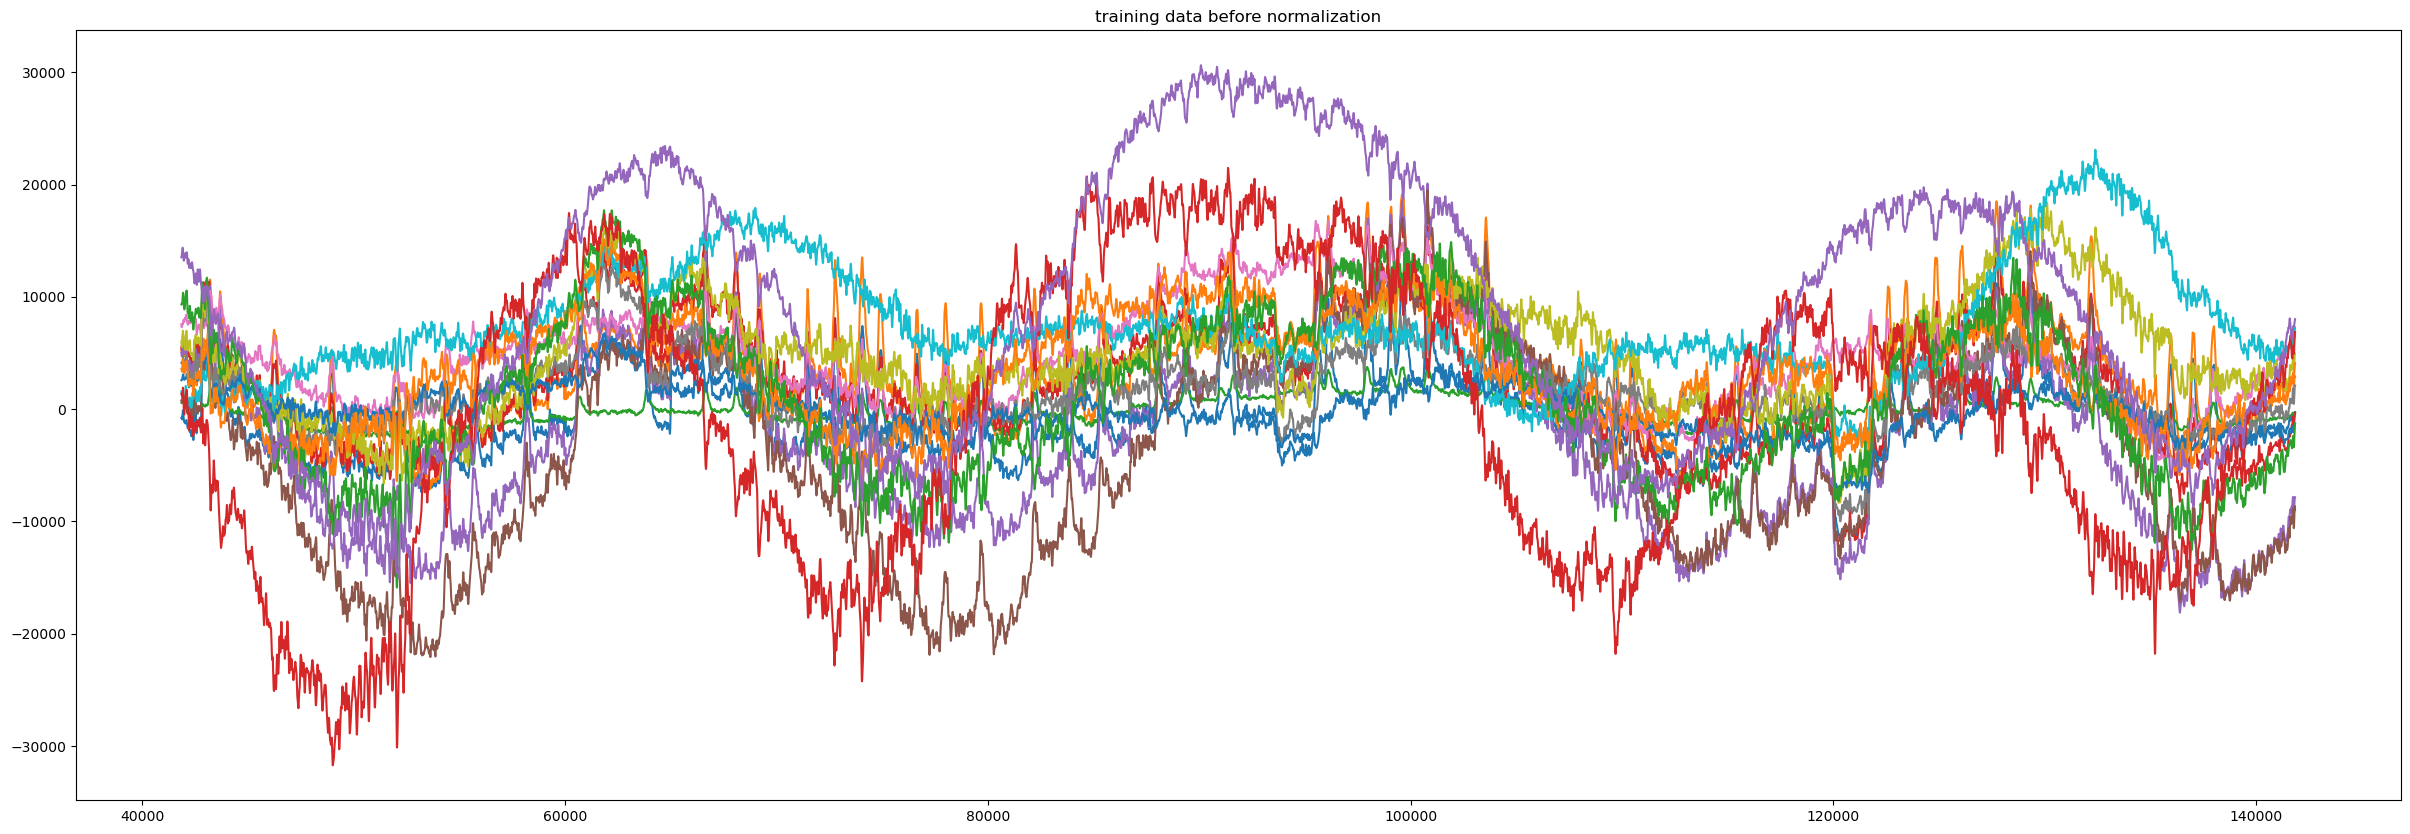

In [20]:
plt.plot(glob_train.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("training data before normalization")

Text(0.5, 1.0, 'testing data before normalization')

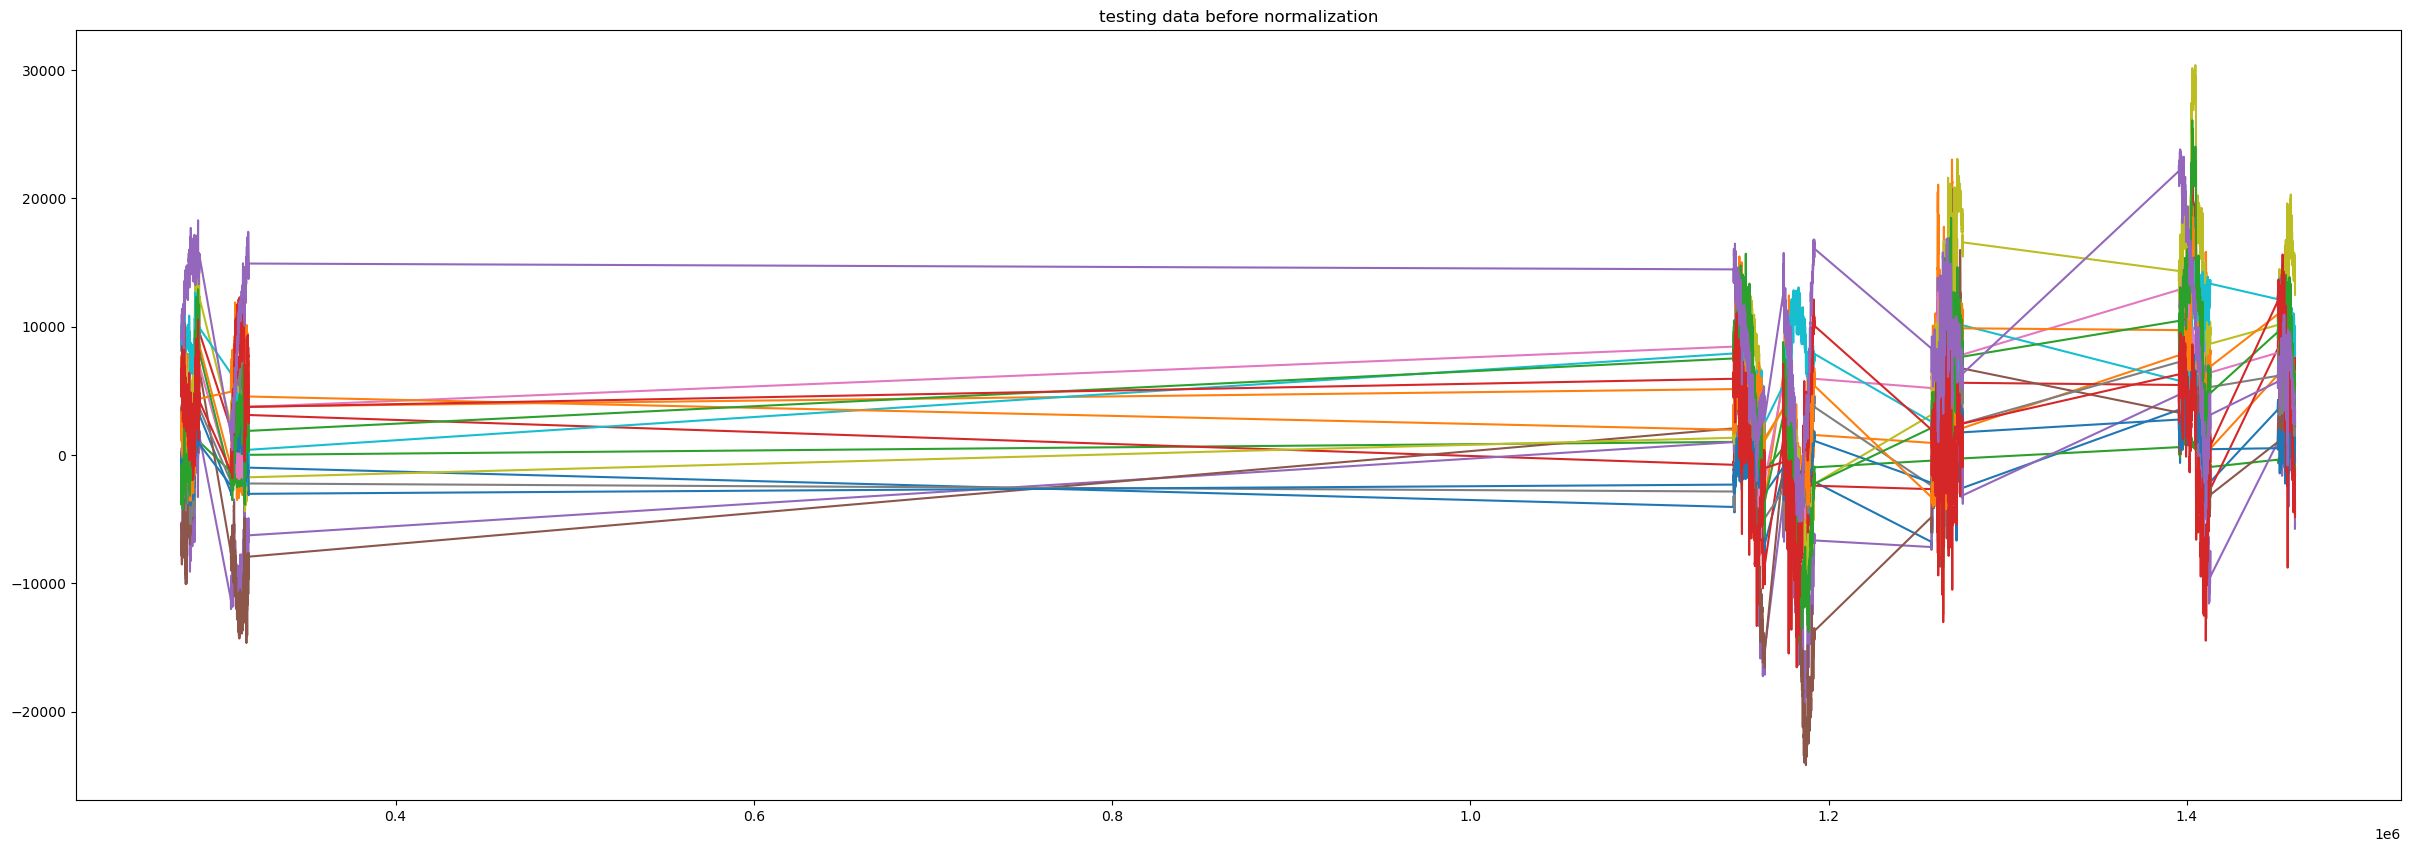

In [21]:
plt.plot(glob_test.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("testing data before normalization")

In [22]:
scaler = MinMaxScaler(feature_range=(-1,1))
glob_train[features] = scaler.fit_transform(glob_train[features])
glob_test[features] = scaler.transform(glob_test[features])

In [23]:
glob_train

ch2_AF7   ch3_AF3   ch4_AFz    ch6_F5    ch7_F3    ch8_F1    ch9_Fz  \
41843   -0.174294  0.152205  0.046353  0.167345  0.152575  0.023286  0.231025   
41844   -0.174364  0.151773  0.046165  0.166427  0.151934  0.022889  0.229987   
41845   -0.174469  0.151309  0.046008  0.165479  0.151324  0.022523  0.229011   
41846   -0.174609  0.150907  0.045820  0.164500  0.150713  0.022217  0.228034   
41847   -0.174749  0.150413  0.045663  0.163429  0.149950  0.021882  0.227149   
...           ...       ...       ...       ...       ...       ...       ...   
1841757 -0.157458 -0.047974  0.024636 -0.049806 -0.079967 -0.039674 -0.041780   
1841758 -0.157493 -0.048592  0.024667 -0.048980 -0.079845 -0.039247 -0.040712   
1841759 -0.157563 -0.049210  0.024667 -0.048123 -0.079784 -0.038911 -0.039705   
1841760 -0.157633 -0.049859  0.024667 -0.047297 -0.079753 -0.038606 -0.038820   
1841761 -0.157738 -0.050478  0.024667 -0.046440 -0.079723 -0.038362 -0.038026   

         ch11_FC5  ch12_FC3  ch13_FC1   ch14_T7   ch15_C5   ch16_C3   ch17_C1  \
41843    0.136862  0.184301  0.048158  0.078646  0.275678  0.284738  0.036291   
41844    0.136923  0.183874  0.047761  0.078829  0.275573  0.284982  0.036138   
41845    0.136954  0.183538  0.047365  0.079073  0.275503  0.285287  0.036077   
41846    0.137016  0.182836  0.046724  0.079257  0.275257  0.285501  0.035923   
41847    0.136985  0.182226  0.046144  0.079409  0.274976  0.285562  0.035647   
...           ...       ...       ...       ...       ...       ...       ...   
1841757 -0.000108 -0.023530 -0.005982  0.000977  0.149314  0.007447  0.022266   
1841758  0.000231 -0.022736 -0.005341  0.001770  0.149630  0.008301  0.022389   
1841759  0.000570 -0.021973 -0.004700  0.002533  0.149911  0.009095  0.022481   
1841760  0.000909 -0.021180 -0.004089  0.003265  0.150191  0.009888  0.022511   
1841761  0.001217 -0.020417 -0.003510  0.003967  0.150437  0.010651  0.022542   

          ch18_Cz  Label  Trial  
41843    0.460027    2.0    1.0  
41844    0.459900    2.0    1.0  
41845    0.460027    2.0    1.0  
41846    0.460090    2.0    1.0  
41847    0.460090    2.0    1.0  
...           ...    ...    ...  
1841757  0.077865    2.0    8.0  
1841758  0.077423    2.0    8.0  
1841759  0.076887    2.0    8.0  
1841760  0.076287    2.0    8.0  
1841761  0.075656    2.0    8.0  

[23151015 rows x 17 columns]

In [24]:
glob_test

ch2_AF7   ch3_AF3   ch4_AFz    ch6_F5    ch7_F3    ch8_F1    ch9_Fz  \
280460  -0.165894  0.042595 -0.004111  0.106189 -0.166621 -0.174902  0.004242   
280461  -0.164074  0.043986 -0.003735  0.106954 -0.165705 -0.173681  0.005219   
280462  -0.162288  0.045315 -0.003358  0.107688 -0.164819 -0.172369  0.006195   
280463  -0.160608  0.046645 -0.002981  0.108300 -0.164148 -0.171270  0.006958   
280464  -0.158998  0.047881 -0.002605  0.108789 -0.163415 -0.170171  0.007874   
...           ...       ...       ...       ...       ...       ...       ...   
2201967 -0.158928 -0.031993  0.024636 -0.019947 -0.004824 -0.005188  0.001373   
2201968 -0.158613 -0.030725  0.024573 -0.021844 -0.005435 -0.004669  0.002960   
2201969 -0.158263 -0.029427  0.024510 -0.023649 -0.005985 -0.004120  0.004608   
2201970 -0.157843 -0.028067  0.024448 -0.025301 -0.006443 -0.003510  0.006378   
2201971 -0.157353 -0.026707  0.024416 -0.026800 -0.006809 -0.002838  0.008209   

         ch11_FC5  ch12_FC3  ch13_FC1   ch14_T7   ch15_C5   ch16_C3   ch17_C1  \
280460   0.109498  0.235145  0.310160  0.000641  0.256202 -0.043062  0.200638   
280461   0.109992  0.234413  0.309641  0.000458  0.255851 -0.043916  0.199288   
280462   0.110361  0.233650  0.309061  0.000244  0.255465 -0.044771  0.197876   
280463   0.110700  0.232795  0.308267 -0.000031  0.255009 -0.045778  0.196188   
280464   0.110947  0.231849  0.307505 -0.000366  0.254483 -0.046846  0.194623   
...           ...       ...       ...       ...       ...       ...       ...   
2201967  0.003528 -0.012970 -0.007599 -0.045869  0.128224 -0.020661 -0.040834   
2201968  0.003251 -0.013123 -0.008057 -0.045625  0.128364 -0.020600 -0.039974   
2201969  0.002974 -0.013245 -0.008362 -0.045351  0.128540 -0.020539 -0.039084   
2201970  0.002696 -0.013337 -0.008576 -0.045045  0.128680 -0.020478 -0.038163   
2201971  0.002450 -0.013398 -0.008667 -0.044710  0.128891 -0.020386 -0.037243   

          ch18_Cz  Label  Trial  
280460   0.323921    6.0    9.0  
280461   0.323448    6.0    9.0  
280462   0.322880    6.0    9.0  
280463   0.322312    6.0    9.0  
280464   0.321807    6.0    9.0  
...           ...    ...    ...  
2201967  0.005837    2.0   10.0  
2201968  0.006941    2.0   10.0  
2201969  0.008077    2.0   10.0  
2201970  0.009213    2.0   10.0  
2201971  0.010380    2.0   10.0  

[5801860 rows x 17 columns]

Text(0.5, 1.0, 'training data after normalization')

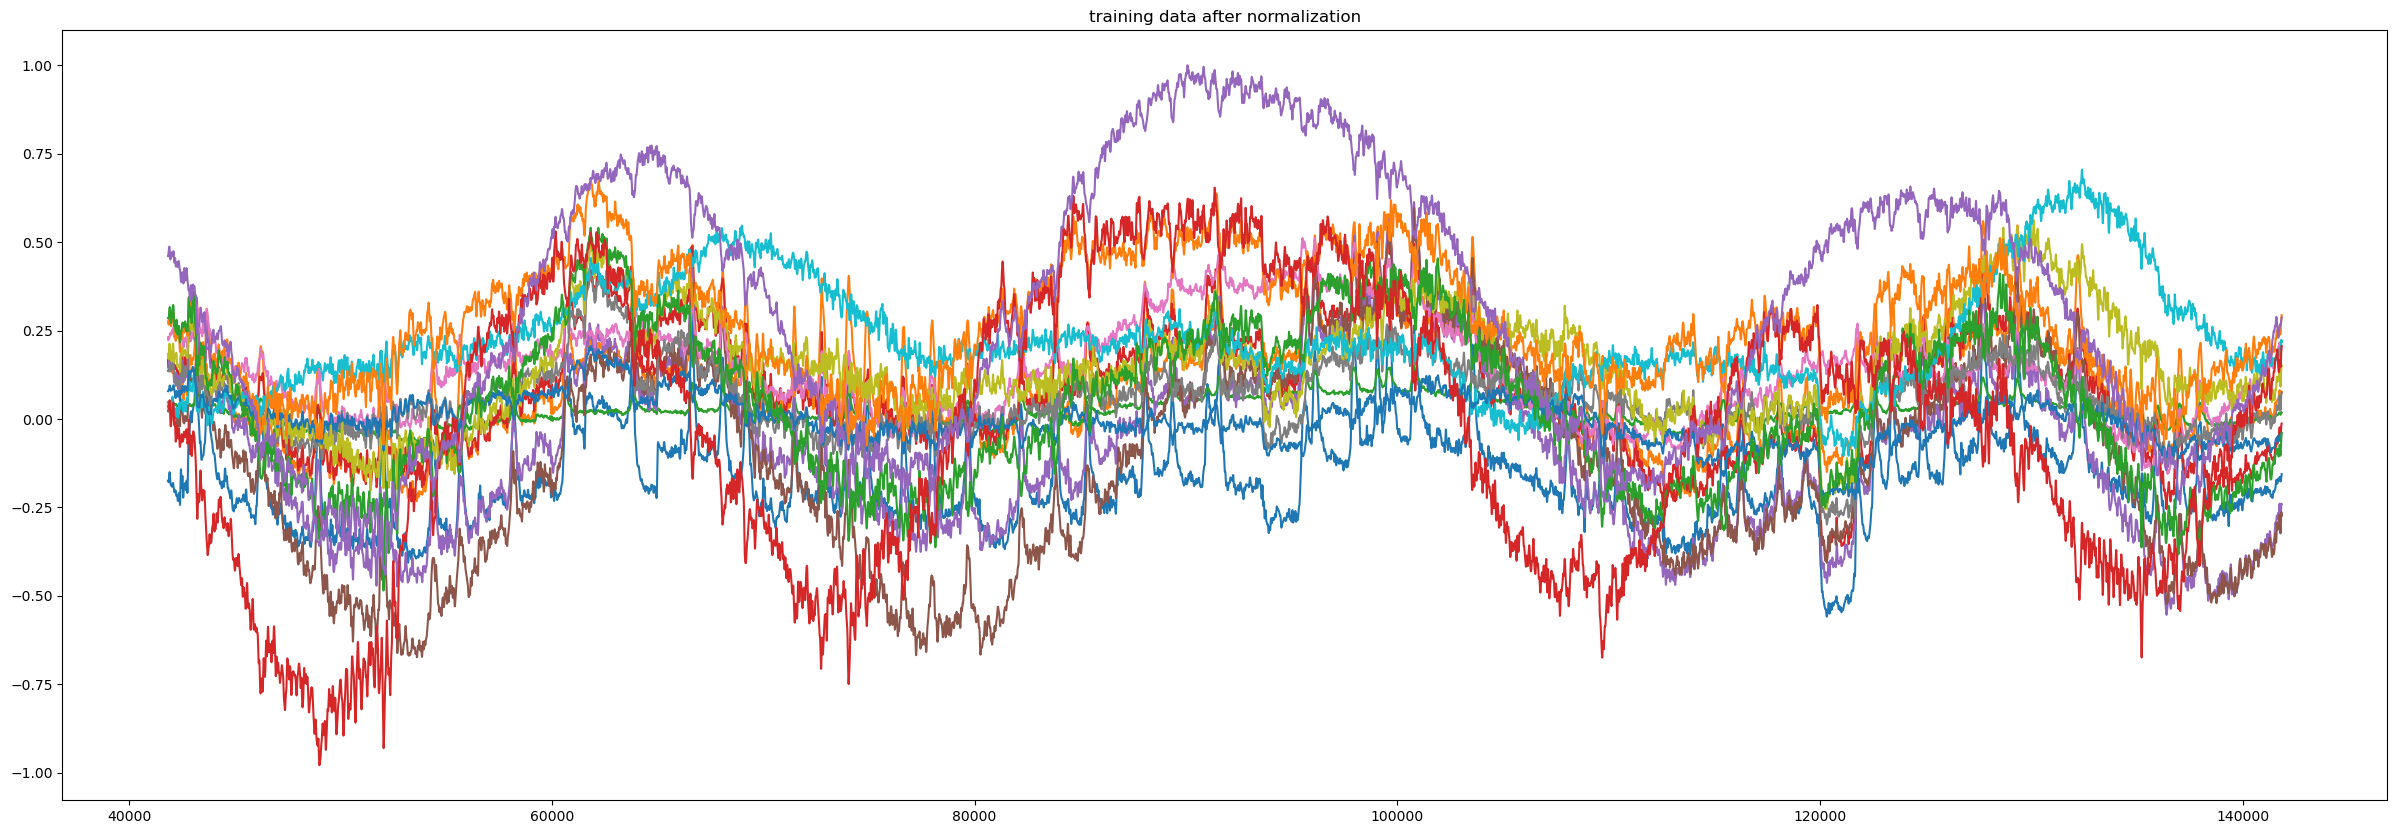

In [25]:
plt.plot(glob_train.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("training data after normalization")

Text(0.5, 1.0, 'testing data after normalization')

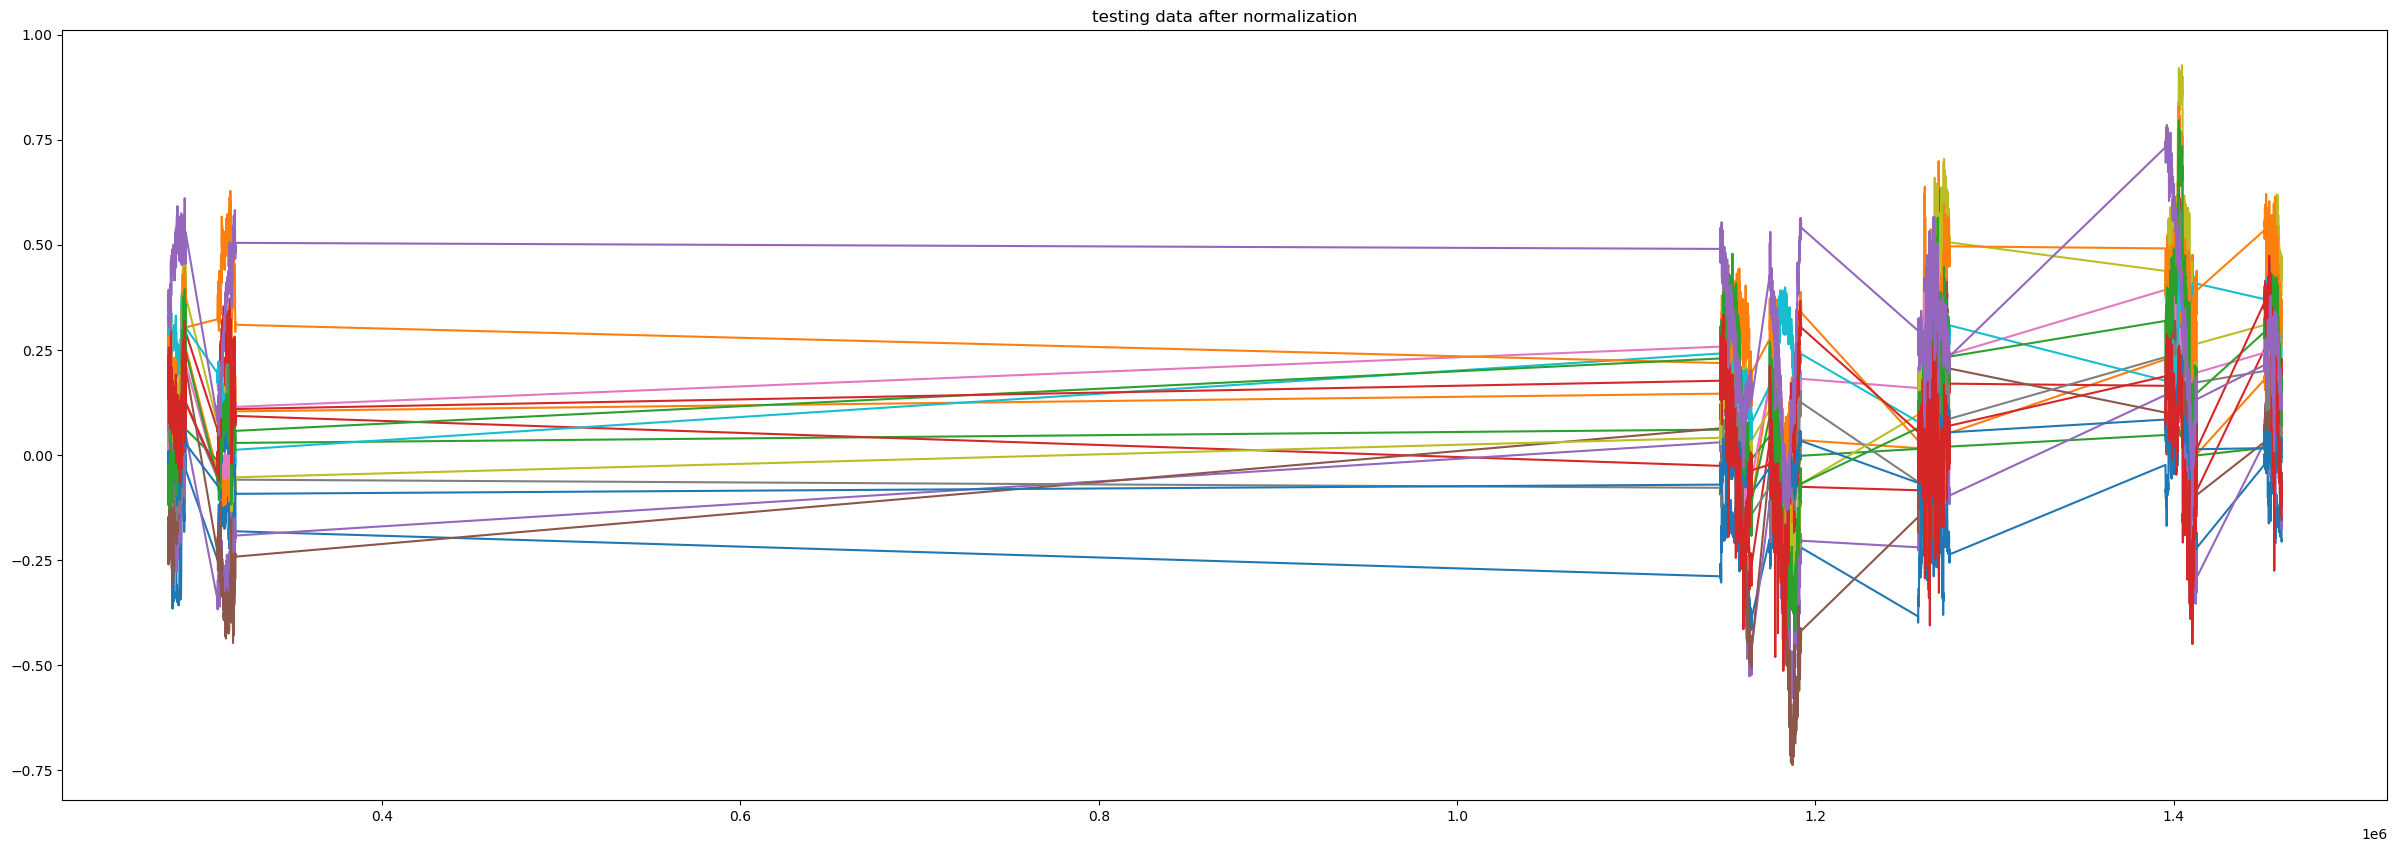

In [26]:
plt.plot(glob_test.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("testing data after normalization")

### apply bandpass filter 

In [29]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

Text(0.5, 1.0, 'training data before filter')

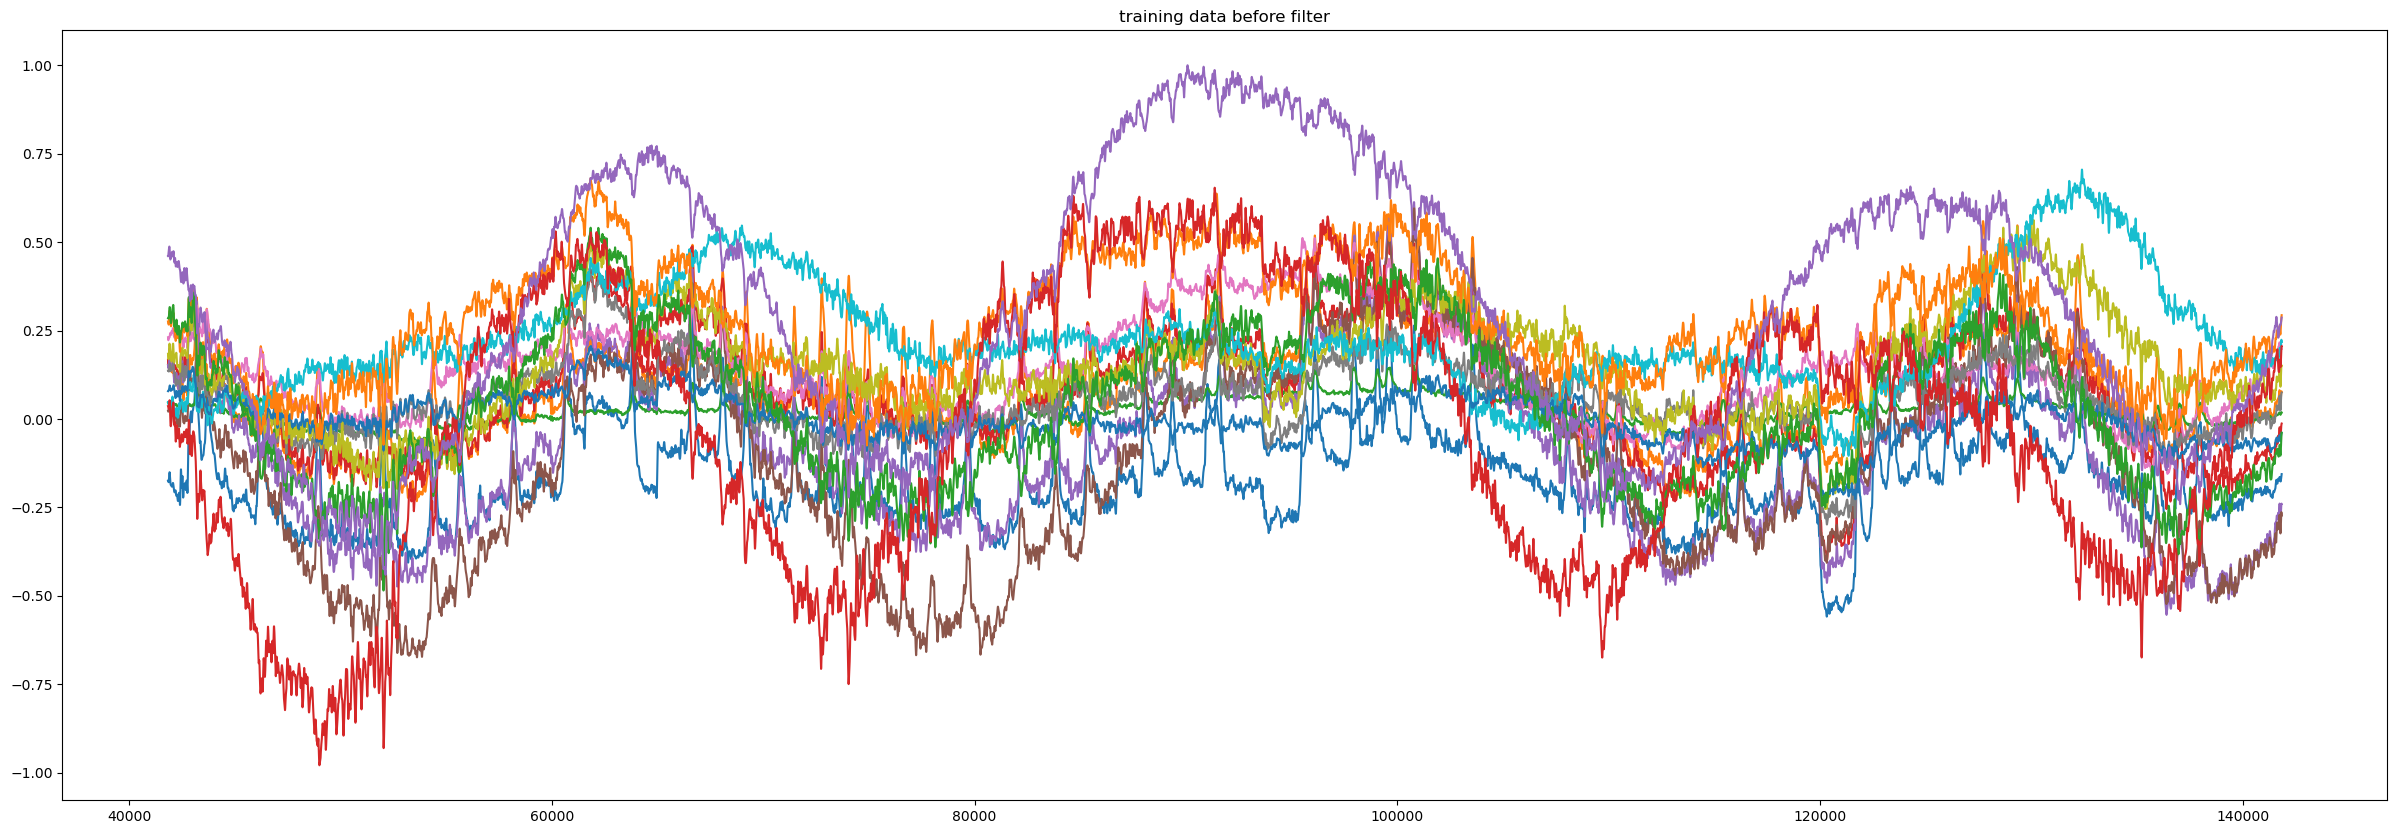

In [30]:
plt.plot(glob_train.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("training data before filter")

Text(0.5, 1.0, 'testing data before filter')

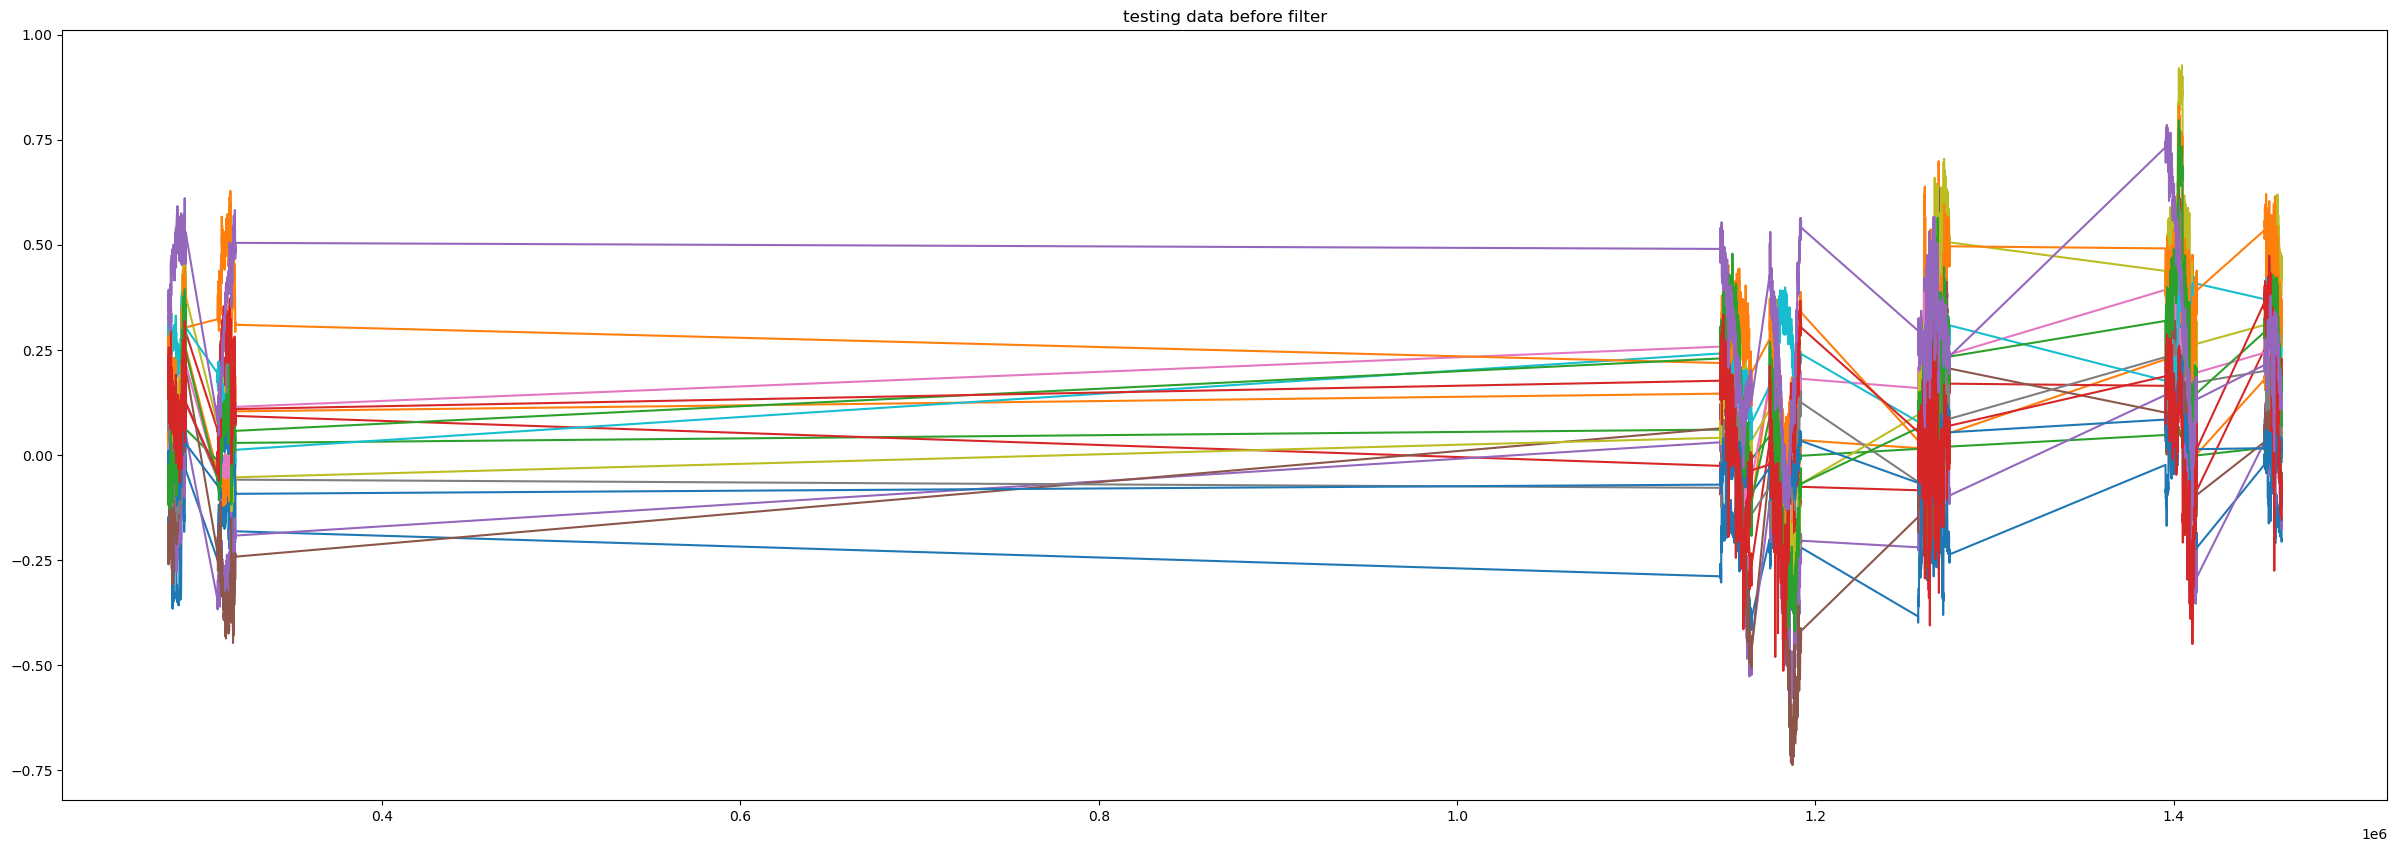

In [31]:
plt.plot(glob_test.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("testing data before filter")

In [32]:
glob_train.iloc[:,0:15] = butter_bandpass_filter(glob_train.iloc[:,0:15].to_numpy() , 8,30,2500)
glob_test.iloc[:,0:15] = butter_bandpass_filter(glob_test.iloc[:,0:15].to_numpy() , 8,30,2500)

Text(0.5, 1.0, 'training data after filter')

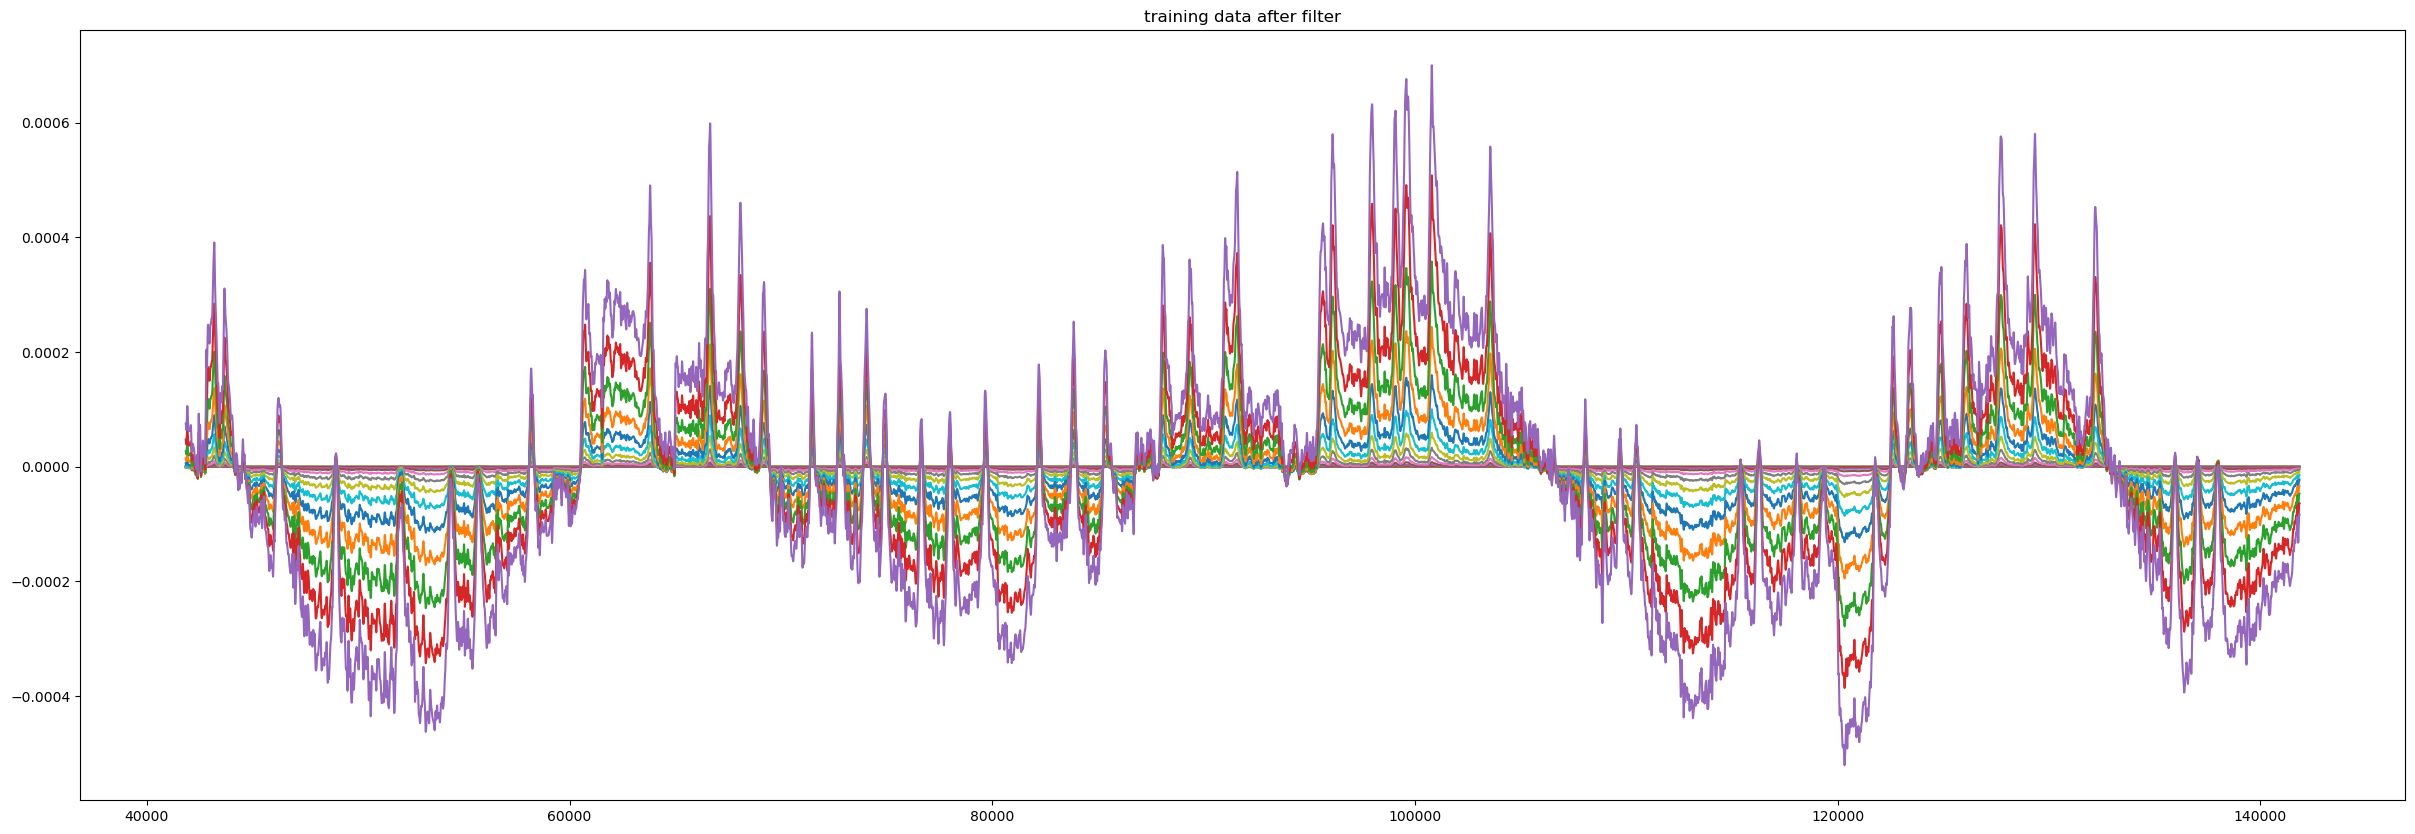

In [43]:
plt.plot(glob_train.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("training data after filter")

Text(0.5, 1.0, 'testing data after filter')

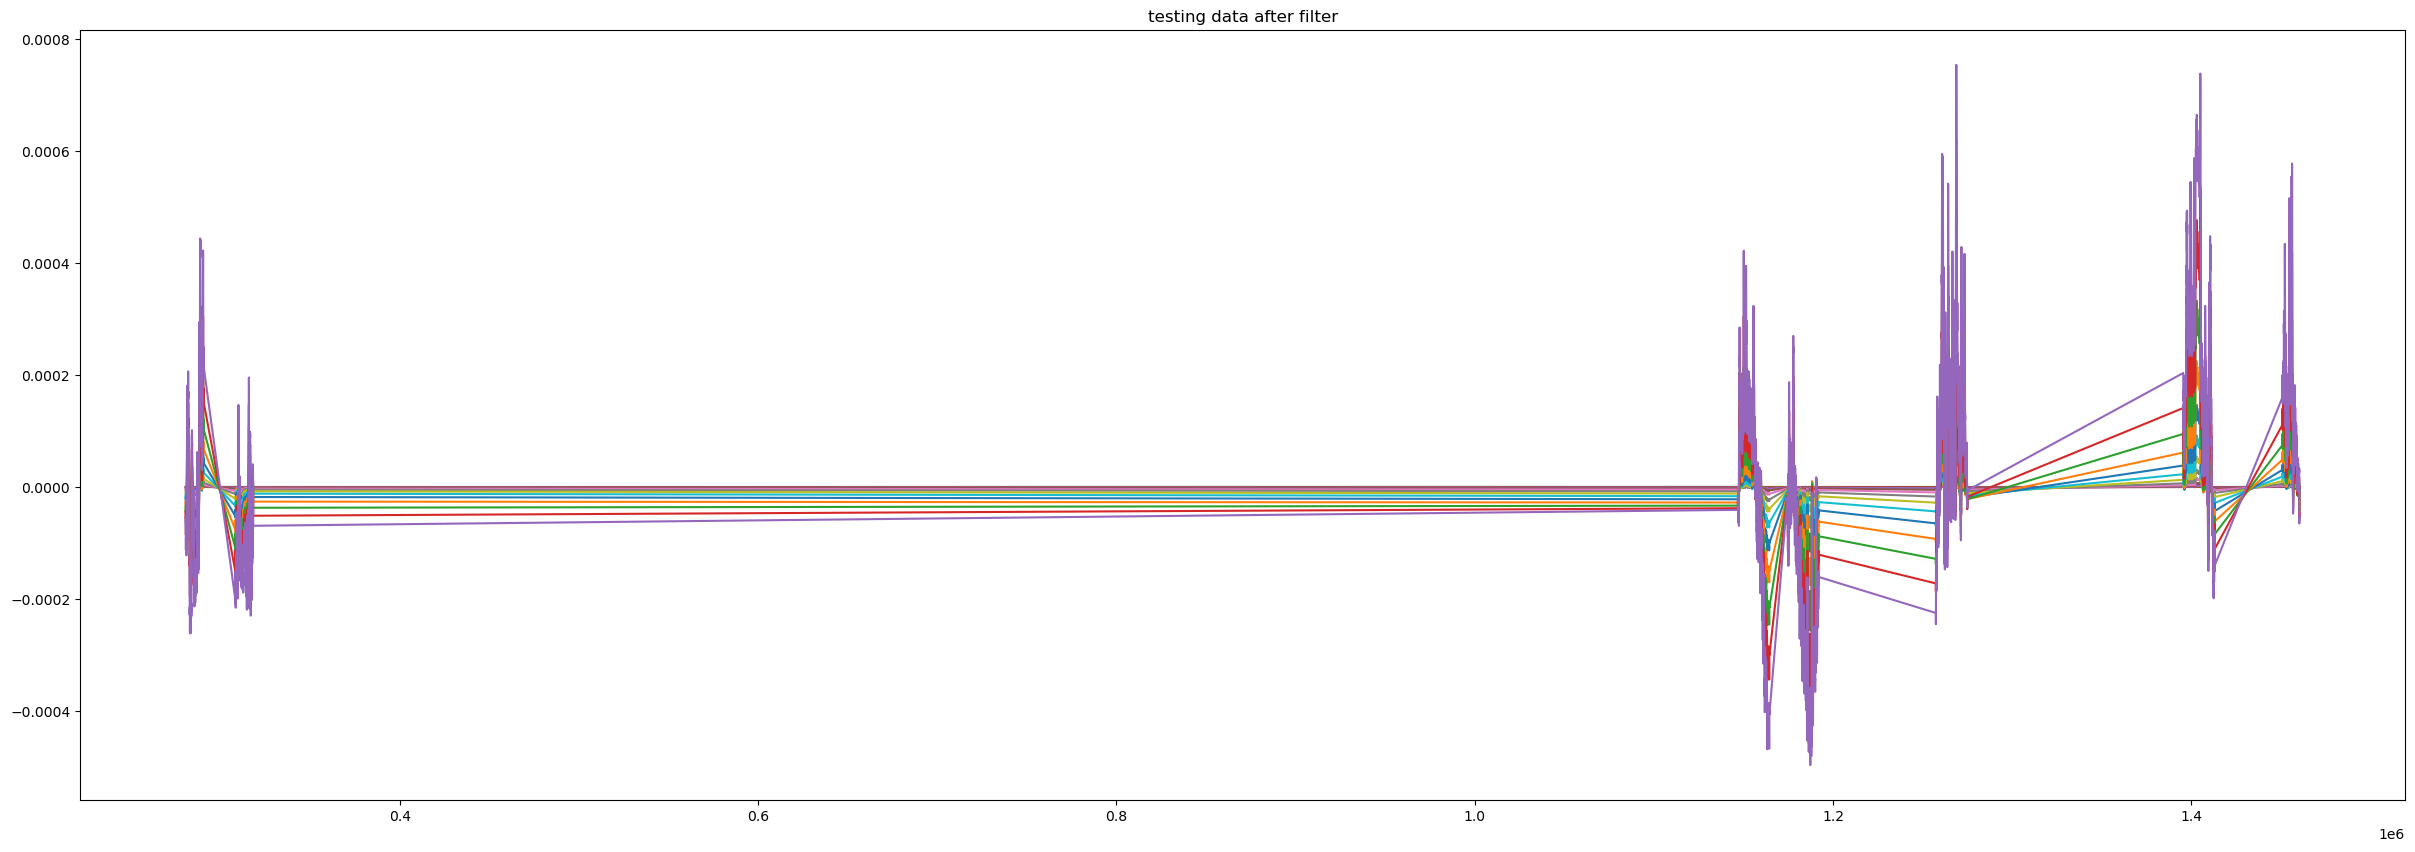

In [49]:
plt.plot(glob_test.iloc[:100000,0:15])
plt.gcf().set_size_inches(30, 10)
plt.title("testing data after filter")

### save the data into excel files

In [27]:
# glob_train.to_csv('D:\EEG_ConvertedData\Arm_reaching_Session1_RM_train.csv',index=False)

In [28]:
# glob_test.to_csv('D:\EEG_ConvertedData\Arm_reaching_Session1_RM_test.csv',index=False)

In [ ]:
# Xtrain=glob_train.iloc[:,0:15] 
# Ytrain=glob_train.iloc[:,-2:]
# Xtest=glob_test.iloc[:,0:15] 
# Ytest=glob_test.iloc[:,-2:]